In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

In [6]:
pneumonia_data=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia\cell_images_pneumonia')
print(pneumonia_data)

parasitized=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia\Parasitized')
print(parasitized[:2])

uninfected=os.listdir(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia\Uninfected')
print(uninfected[:2])

['Parasitized', 'Uninfected']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg']
['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg']


I realized later in the code that the dataset has another cell_images folder with the same parasitized and uninfected folders, so I tried to work with double amount of images..

### Display Images Using OpenCV and Matplotlib

In [8]:
import cv2

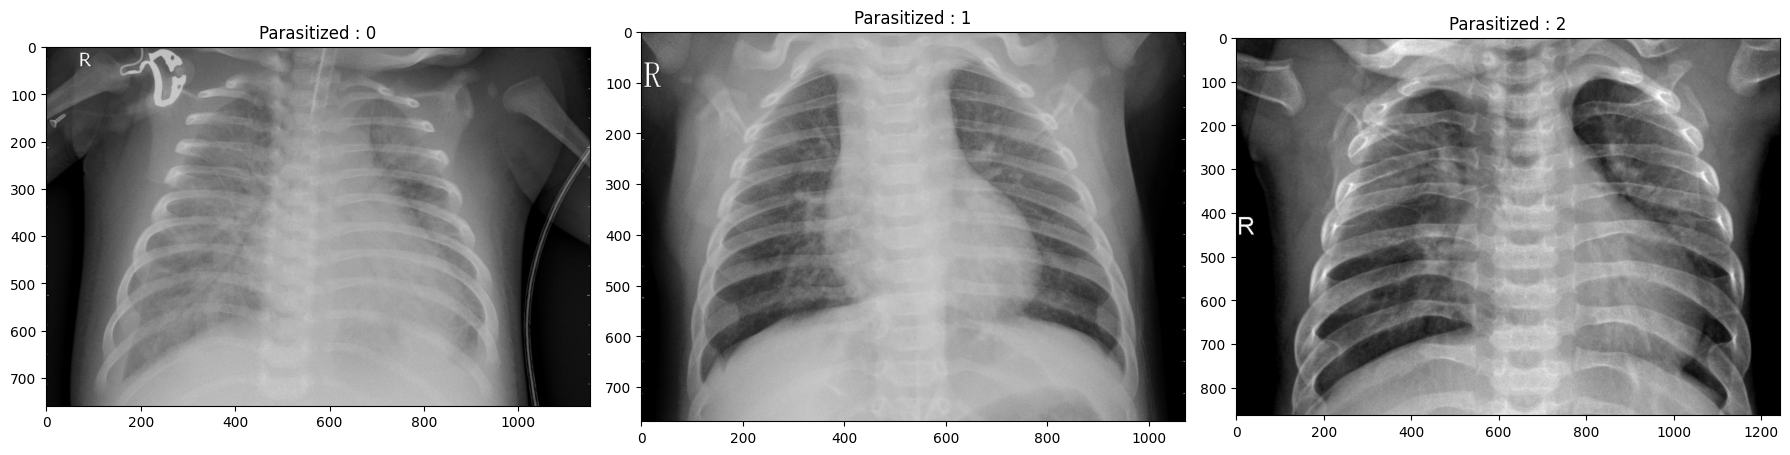

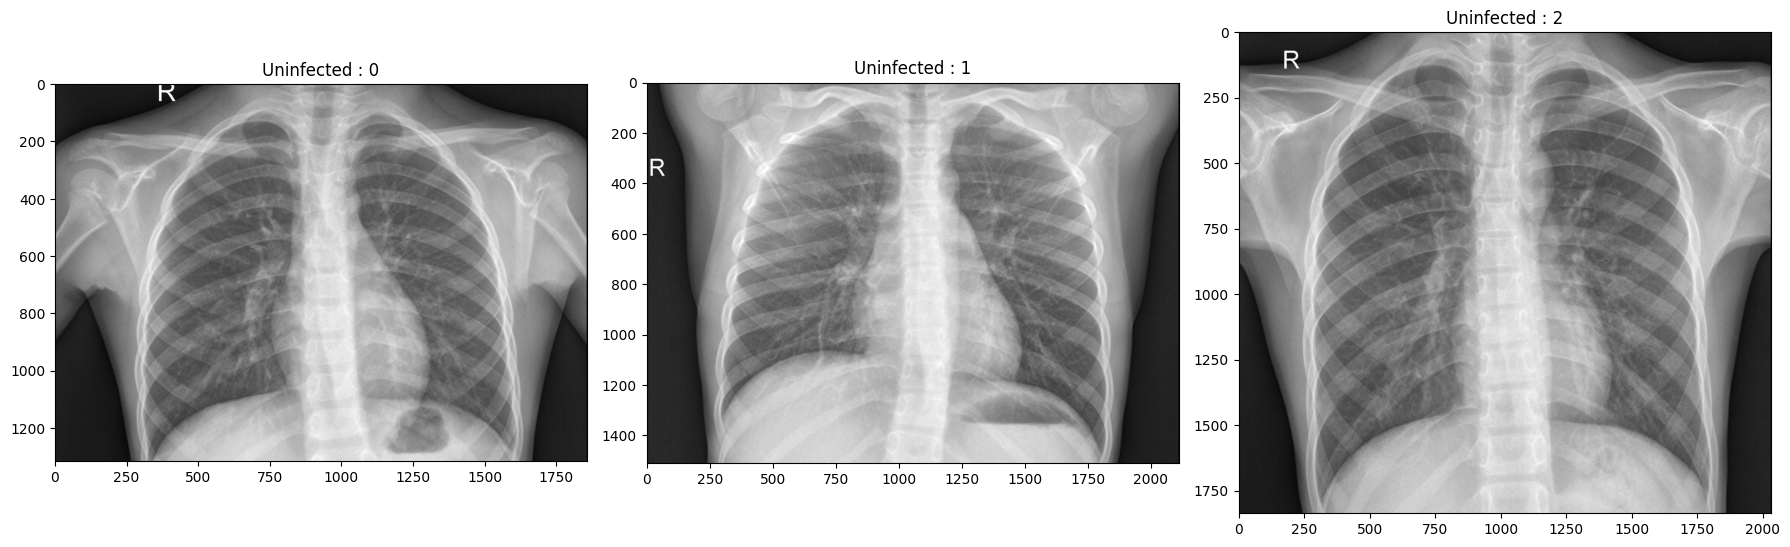

In [9]:
# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia/Parasitized' + "/" + parasitized[i])
    plt.imshow(img)
    plt.title('Parasitized : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

# show fisrt 3 parasitized images
plt.figure(figsize = (18,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia/Uninfected' + "/" + uninfected[i])
    plt.imshow(img)
    plt.title('Uninfected : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array

In [11]:
data = [] # This is where we store the images
labels = [] # This is where we store the labels 
for img in parasitized: #go through all parasitized images
    try:
        img_read = plt.imread(r'C:\Users\shobhit\Desktop\Final year project\pneumonia\cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(1) # add a 1 to the labels for "parasitized"
    except:
        None
        
for img in uninfected: #go through all uninfected images
    try:
        img_read = plt.imread(r'C:\Users\shobhit\Desktop\Final year project\pneumonia\cell_images/Uninfected' + "/"+ img)
        img_resize = cv2.resize(img_read, (100, 100)) #resizing the image to 100w x 100h
        img_array = img_to_array(img_resize) # convert image from abstract format to an array format
        data.append(img_array) # append the image to the data list
        labels.append(0) # add a 0 to the labels for "uninfected"
    except:
        None

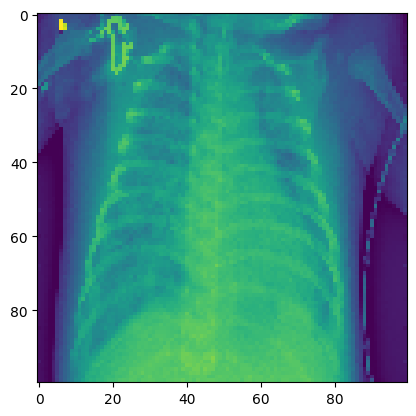

In [12]:
#show an example of our data and label
plt.imshow(data[0])
plt.show()

In [13]:
print(labels[0]) # output is 1 for parasitized

1


Use another way to generate Dataset

### Generate a tf.data.Dataset from Image files in our directory 

In [14]:
import pathlib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras.layers import Dropout
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from tensorflow.keras import layers

In [20]:
cell_images = pathlib.Path(r'C:\Users\shobhit\Desktop\Flask\notebook\cell_images_pneumonia\cell_images_pneumonia')

In [22]:
# Train Dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='training', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 5840 files belonging to 2 classes.
Using 4672 files for training.


In [23]:
# Validation Dataset
val_data = tf.keras.utils.image_dataset_from_directory(
    cell_images, #directory for our dataset
    batch_size=64,
    image_size=(100, 100),# height x width
    seed=123, # Optional random seed for shuffling and transformations. 
    validation_split=0.2, # Optional float between 0 and 1, fraction of data to reserve for validation. 
    subset='validation', # Subset of the data to return. One of "training", "validation" or "both". Only used if validation_split is set
)

Found 5840 files belonging to 2 classes.
Using 1168 files for validation.


In [24]:
classes = train_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [25]:
classes = val_data.class_names
print(classes)

['Parasitized', 'Uninfected']


In [17]:
# import tensorflow_datasets as tfds

In [38]:
#ds, info = tfds.load('malaria', split='train', shuffle_files=True, with_info=True)

**AUTOTUNE** will prompt the tf. data runtime to tune the value dynamically at runtime, because we have a big amount of data

In [26]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)    

## Build Model

In [28]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(100, 100, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.4),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

In [29]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics="accuracy") #  binary classification problem

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 32)       

In [31]:
tf.keras.backend.clear_session() # clear cache

In [32]:
model.fit(train_data, validation_data=val_data, epochs=15)

Epoch 1/15
73/73 [==============================] - 146s 783ms/step - loss: 0.3540 - accuracy: 0.8639 - val_loss: 0.5109 - val_accuracy: 0.8887
Epoch 2/15
73/73 [==============================] - 36s 494ms/step - loss: 0.1365 - accuracy: 0.9486 - val_loss: 0.5443 - val_accuracy: 0.8716
Epoch 3/15
73/73 [==============================] - 36s 495ms/step - loss: 0.1154 - accuracy: 0.9542 - val_loss: 0.4184 - val_accuracy: 0.9375
Epoch 4/15
73/73 [==============================] - 36s 497ms/step - loss: 0.1111 - accuracy: 0.9578 - val_loss: 0.2833 - val_accuracy: 0.9503
Epoch 5/15
73/73 [==============================] - 36s 493ms/step - loss: 0.0932 - accuracy: 0.9649 - val_loss: 0.2664 - val_accuracy: 0.9264
Epoch 6/15
73/73 [==============================] - 37s 502ms/step - loss: 0.0902 - accuracy: 0.9653 - val_loss: 0.1955 - val_accuracy: 0.9435
Epoch 7/15
73/73 [==============================] - 36s 492ms/step - loss: 0.0757 - accuracy: 0.9728 - val_loss: 0.1423 - val_accuracy: 0.952

In [33]:
_,accuracy=model.evaluate(val_data)

19/19 [==============================] - 2s 114ms/step - loss: 0.1483 - accuracy: 0.9563


We can see that our model has an accuracy of 95.63%

In [35]:
# Loading model to compare the results
# model_write = pickle.load(open('./model.pkl','rb'))
from keras.models import load_model
model.save('pneumonnia_model.h5')
